**get all images from imgflip.com**


In [12]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import json
import csv
import os
import shutil
try:
  os.mkdir("car_images")
except FileExistsError:
  shutil.rmtree("/content/car_images")
  os.makedirs("car_images")
filecsv = open('OpenSouqnew.csv', 'w', encoding='utf8')
file = open('OpenSouqnew.json', 'w', encoding='utf8')
# Set the URL you want to webscrape from
url = 'https://jo.opensooq.com/ar/%D8%B3%D9%8A%D8%A7%D8%B1%D8%A7%D8%AA-%D9%88%D9%85%D8%B1%D9%83%D8%A8%D8%A7%D8%AA/%D8%B3%D9%8A%D8%A7%D8%B1%D8%A7%D8%AA-%D9%84%D9%84%D8%A8%D9%8A%D8%B9?page='

file.write('[\n')
data = {}
csv_columns = ['name', 'price', 'img', 'year', 'type1', 'type2']
writer = csv.DictWriter(filecsv, fieldnames=csv_columns)
writer.writeheader()

for page in range(1,10):
    print('---', page, '---')
    r = requests.get(url + str(page))
    print(url + str(page))
    soup = BeautifulSoup(r.content, "html.parser")
    ancher = soup.findAll('li', {'class': 'rectLi relative mb15'})
    # print(len(ancher))
    # break
    i = 0
 
    for pt in ancher:
        if pt.find('h2', {'class': 'fRight mb15'}) and pt.find('span', {'class': 'inline ltr'}): # if title and prive available
            # print("x")
            name = pt.find('h2', {'class': 'fRight mb15'})
            print("name",name.get_text().strip())
            price = pt.find('span', {'class': 'inline ltr'})
            print("price",price.get_text())
            img = pt.find('img', {'class': 'block'})
            print("img",img.get('src'))
            # save image to path 
            urllib.request.urlretrieve(img.get('src'), "car_images/"+name.get_text().replace('/','').strip()+"."+img.get('src').split(".")[-1])
            car_det = pt.find('div', {'class': 'rectCatesLinks mb15 mt15 clear'}).find_all('span', {'class': 'font-12 inline'})
            # print(car_det)

           
            # print(len(car_det))
            if len(car_det) > 2:
                car_type_1 = car_det[1].get('title')
                print("car_type1: ", car_type_1)
                car_type_2 = car_det[2].get('title')
                print("car_type2: ", car_type_2)
                year = car_det[3].get('title')
                print("year: ", year)

                writer.writerow({'name': name.text, 'price': price.text.replace(',', ''), 
                                 'img': img.get('src'), 'type1': car_type_1, 'type2': car_type_2,'year': year})
                data['name'] = name.text.strip()
                data['price'] = price.text.replace(',', '')
                data['year'] = year
                data['type1'] = car_type_1
                data['type2'] = car_type_2
                data['img'] = img.get('src')
                json_data = json.dumps(data, ensure_ascii=False)
                file.write(json_data)
                file.write(",\n")
                print("-----------------")
file.write("\n]")
filecsv.close()
file.close()
print(len(os.listdir('/content/car_images')), "car images are extracted")


--- 1 ---
https://jo.opensooq.com/ar/%D8%B3%D9%8A%D8%A7%D8%B1%D8%A7%D8%AA-%D9%88%D9%85%D8%B1%D9%83%D8%A8%D8%A7%D8%AA/%D8%B3%D9%8A%D8%A7%D8%B1%D8%A7%D8%AA-%D9%84%D9%84%D8%A8%D9%8A%D8%B9?page=1
name هيونداي اكسنت اتوماتيك حالة الوكاله
price 8,700
img https://opensooq-images.os-cdn.com/previews/220x0/65/34/6534a3f0637d9bb8bbfe4e2881f1190584c9bd759a5832a0a7d1fc1cb4583a4f.jpg.jpg
car_type1:  هيونداي
car_type2:  أكسنت
year:  2012
-----------------
name Mercedes E200 special edition مواصفات نادره
price 26,450
img https://opensooq-images.os-cdn.com/previews/220x0/75/dd/75dd4b7ff1872a779ef4072f834f53e8e4b3df5a478018600405f6b75391afc4.jpg.jpg
car_type1:  مرسيدس بنز
car_type2:  E 200
year:  2011
-----------------
name S350 2006 مرسيدس
price 18,500
img https://opensooq-images.os-cdn.com/previews/220x0/2d/04/2d046ef22fdbe317d44ec07b310d279640d05135f17dbfac11da73b1c189ef68.jpg.jpg
car_type1:  مرسيدس بنز
car_type2:  S 350
year:  2006
-----------------
name كيا ريو 2019 فحص 7 جيد
price 13,500
img http

**plot cars type and price of the opensooq.com**

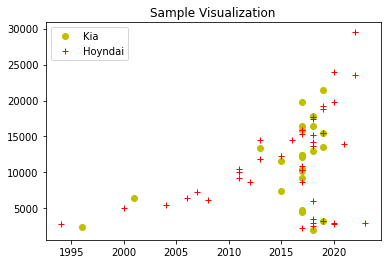

In [13]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

sam = pd.read_csv("/content/OpenSouqnew.csv").sort_values('year')


#sab = sam.set_index(["name", "type"]).count(level="type")
# print(sab)
kia = sam[sam.type1 == 'كيا']
# kia = kia[kia.year > 1990]
# kia = kia[kia.year < 2020]
# kia = kia[kia.price < 40000]

honday = sam[sam.type1 == 'هيونداي']
# honday = honday[honday.year > 1990]
# honday = honday[honday.year < 2020]
# honday = honday[honday.price < 40000]
kia_ys = kia.price.astype(float)
kia_x = kia.year
honday_ys = honday.price.astype(float)
honday_x = honday.year
plt.plot(kia_x, kia_ys, 'yo')
plt.plot(honday_x, honday_ys, 'r+')
plt.title("Sample Visualization")
plt.legend(['Kia', 'Hoyndai'])
plt.show()